/media/wesleyz/HD1Tera/anacond3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/media/wesleyz/HD1Tera/anacond3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


B_PESSOA-------------------------------------


/media/wesleyz/HD1Tera/anacond3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/media/wesleyz/HD1Tera/anacond3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/media/wesleyz/HD1Tera/anacond3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/media/wesleyz/HD1Tera/anacond3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

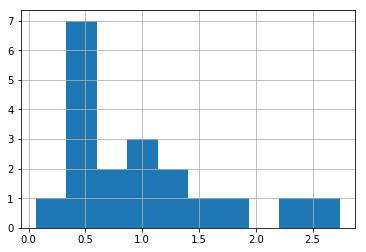

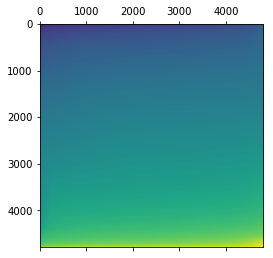

In [1]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jun  7 12:52:01 2019

@author: wesleyz
"""
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd 
from sklearn import preprocessing

path = os.getcwd() # my actual path    
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 


#"features-harem-cd-1.csv"
#"labels-harem-cd-1.csv"

filedata = path + '/features-harem-cd-2.csv'
fileLabel = path + '/labels-names-harem-cd-2_.csv'
fullfile = path + '/full-harem-cd-2.csv'

#data = pd.read_csv("features-harem-cd-1.csv") 
data = pd.read_csv(filedata) 
label = pd.read_csv(fileLabel) 
fulldata = pd.read_csv(fullfile) 



def classifica(df, k):
    bench = []
    # Preview the first 5 lines of the loaded data 
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'label'], fulldata.label, test_size=0.20, random_state=42)
    maxi = []
    print('B_PESSOA-------------------------------------')
    for j in  ['precision', 'recall', 'f1-score']: #['precision']:
        
        fig = plt.figure()    
        for i in range(2,k,1):    
            clf = neighbors.KNeighborsClassifier(i, n_jobs = 20)
            clf.fit(X_train,y_train)
            #clf.fit(df.loc[df['label'] == 2], df.loc[df['label'] == 2].label)
            y_pred = clf.predict(X_test)        
            #y_pred = clf.predict(fulldata.loc[:, fulldata.columns != 'label'])        
            cr = classification_report(y_test, y_pred, output_dict=True)
            
            #bench.append((i, cr['I_PESSOA'][j], 'j'))        
            bench.append((j, i, cr['2'][j]))
            
            
        #benc = pd.DataFrame(bench, columns=['k', 'valor', 'metrica',])
        #aux = benc.loc[benc['valor'] == benc.valor.max()],  benc.valor.max()
        #maxi.append((j, benc.valor.max(), aux))
        #benc.hist()
        #ax = plt.axes()
        #ax.plot(benc.k, benc.valor, label = j);
        #plt.legend()
        #plt.show()
        
    
    return bench
    


from sklearn.metrics.pairwise import cosine_similarity

from sklearn import preprocessing

df = fulldata

# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

df = scaled_df

cosimi = cosine_similarity(scaled_df)

dfS = pd.DataFrame(scaled_df)


cosimi.sort(axis=0)
cosimi.sort(axis=1)




metrics = classifica(scaled_df, 10)
from numpy import linalg as LA
w, v = LA.eigh(scaled_df.cov())
wS = pd.Series(w)
wS.hist()
#v.shape
#w.shape
df5 = pd.DataFrame(w)
#df5 = pd.DataFrame(v)

#df.cov()

plt.matshow(cosimi)
plt.show()





metr = pd.DataFrame(metrics, columns=['metrica', 'k', 'valor',])

print(metr)


In [2]:

import seaborn as sns
metr = pd.DataFrame(metrics, columns=['metrica', 'k', 'score',])


pivot = metr.pivot_table(index=[ 'k', ], columns=['metrica'],fill_value=0,  aggfunc=['mean'])




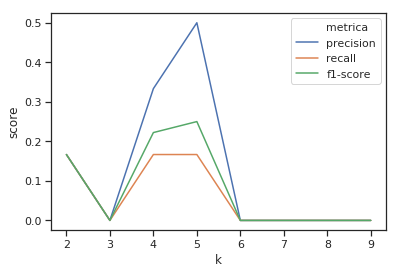

In [3]:

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


sns.set(style="ticks", color_codes=True)


#kind="count"
#sns.catplot(x="k", y="valor", kind="violin", data=metr, hue="metrica");
ax = sns.lineplot(x="k", y="score", hue="metrica", data=metr);


Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in %0.3fs

Homogeneity: 0.017
Completeness: 0.012
V-measure: 0.014
Adjusted Rand-Index: 0.007
Silhouette Coefficient: 0.158

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in %0.3fs

Homogeneity: 0.171
Completeness: 0.067
V-measure: 0.096
Adjusted Rand-Index: 0.049
Silhouette Coefficient: 0.125

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=4,
        n_init=1, random_state=None

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=24,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in %0.3fs

Homogeneity: 0.634
Completeness: 0.084
V-measure: 0.149
Adjusted Rand-Index: 0.012
Silhouette Coefficient: 0.096

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=25,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in %0.3fs

Homogeneity: 0.607
Completeness: 0.081
V-measure: 0.143
Adjusted Rand-Index: 0.012
Silhouette Coefficient: 0.098

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=26,
        n_init=1, random_state=N

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=46,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in %0.3fs

Homogeneity: 0.680
Completeness: 0.075
V-measure: 0.134
Adjusted Rand-Index: 0.006
Silhouette Coefficient: 0.109

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=47,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in %0.3fs

Homogeneity: 0.677
Completeness: 0.075
V-measure: 0.135
Adjusted Rand-Index: 0.006
Silhouette Coefficient: 0.105

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=48,
        n_init=1, random_state=N

V-measure: 0.120
Adjusted Rand-Index: 0.004
Silhouette Coefficient: 0.086

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=67,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in %0.3fs

Homogeneity: 0.662
Completeness: 0.066
V-measure: 0.120
Adjusted Rand-Index: 0.004
Silhouette Coefficient: 0.092

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=68,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in %0.3fs

Homogeneity: 0.672
Completeness: 0.067
V-measure: 0.122
Adjusted Rand-Index: 0.004
Silhouette Coefficient: 0.086

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=

done in %0.3fs

Homogeneity: 0.689
Completeness: 0.065
V-measure: 0.119
Adjusted Rand-Index: 0.003
Silhouette Coefficient: 0.087

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=88,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in %0.3fs

Homogeneity: 0.688
Completeness: 0.065
V-measure: 0.119
Adjusted Rand-Index: 0.003
Silhouette Coefficient: 0.086

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=89,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in %0.3fs

Homogeneity: 0.708
Completeness: 0.067
V-measure: 0.122
Adjusted Rand-Index: 0.003
Silhouette Coefficient: 0.080

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=Tr

done in %0.3fs

Homogeneity: 0.734
Completeness: 0.066
V-measure: 0.121
Adjusted Rand-Index: 0.003
Silhouette Coefficient: 0.085

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10,
        n_clusters=109, n_init=1, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)
done in %0.3fs

Homogeneity: 0.715
Completeness: 0.064
V-measure: 0.118
Adjusted Rand-Index: 0.003
Silhouette Coefficient: 0.088

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10,
        n_clusters=110, n_init=1, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)
done in %0.3fs

Homogeneity: 0.702
Completeness: 0.063
V-measure: 0.115
Adjusted Rand-Index: 0.002
Silhouette Coefficient: 0.075

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=

done in %0.3fs

Homogeneity: 0.727
Completeness: 0.063
V-measure: 0.117
Adjusted Rand-Index: 0.003
Silhouette Coefficient: 0.086

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10,
        n_clusters=130, n_init=1, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)
done in %0.3fs

Homogeneity: 0.725
Completeness: 0.062
V-measure: 0.115
Adjusted Rand-Index: 0.002
Silhouette Coefficient: 0.086

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10,
        n_clusters=131, n_init=1, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)
done in %0.3fs

Homogeneity: 0.729
Completeness: 0.064
V-measure: 0.117
Adjusted Rand-Index: 0.002
Silhouette Coefficient: 0.085

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=

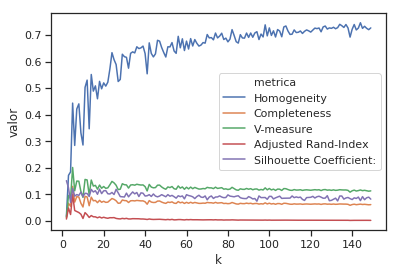

In [3]:
from sklearn.cluster import KMeans, MiniBatchKMeans
import sklearn.metrics as mt

bench2 = []
for i in range(2,150, 1):
    true_k = i
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                             init_size=1000, batch_size=1000)
    print("Clustering sparse data with %s" % km)
    labels = label.label.values #label.values #fulldata.label
    km.fit(df)
    print("done in %0.3fs")
    print()

    print("Homogeneity: %0.3f" % mt.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % mt.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % mt.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % mt.adjusted_rand_score(labels, km.labels_))
    print("Silhouette Coefficient: %0.3f"
          % mt.silhouette_score(df, km.labels_, sample_size=1000))

    print()
    bench2.append(('Homogeneity',i, mt.homogeneity_score(labels, km.labels_)))
    bench2.append(('Completeness',i, mt.completeness_score(labels, km.labels_)))
    bench2.append(('V-measure',i, mt.v_measure_score(labels, km.labels_)))
    bench2.append(('Adjusted Rand-Index',i, mt.adjusted_rand_score(labels, km.labels_)))
    bench2.append(('Silhouette Coefficient:',i, mt.silhouette_score(df, km.labels_, sample_size=1000)))

    
    
bench2
metr2 = pd.DataFrame(bench2, columns=['metrica', 'k', 'valor',])
metr2


import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


sns.set(style="ticks", color_codes=True)


#kind="count"
#sns.catplot(x="k", y="valor", kind="violin", data=metr, hue="metrica");
ax = sns.lineplot(x="k", y="valor", hue="metrica", data=metr2);